In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
from IPython.display import clear_output

plt.rcParams.update({'font.size': 18})

<img src="https://imgur.com/orZWHly.png" alt="Drawing" style="width: 800px;"/>
source: @allison_horst https://github.com/allisonhorst/penguins

# Загрузка данных

In [361]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [363]:
df.dropna(inplace=True)

# Визуализации

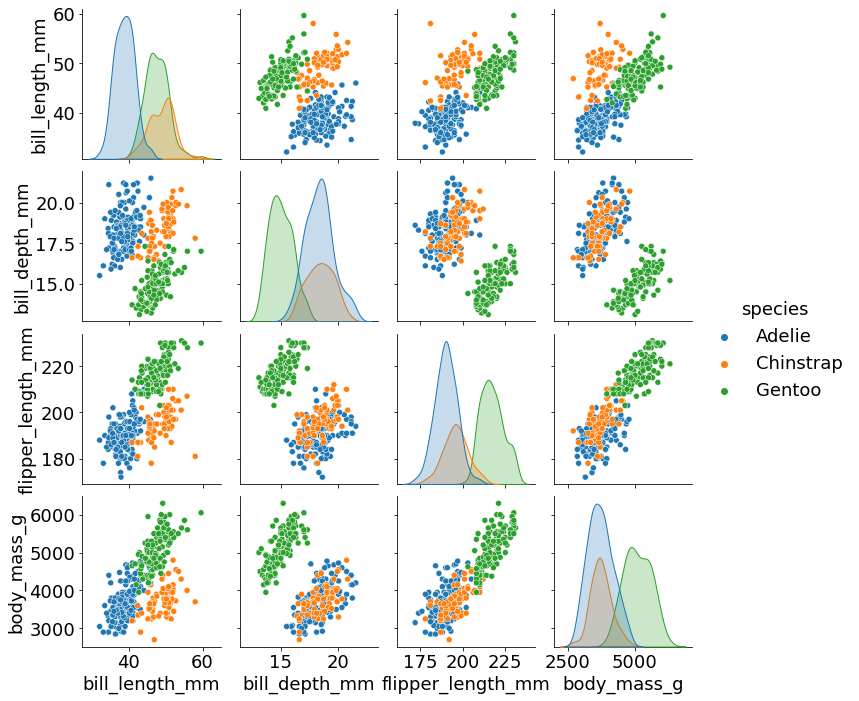

In [364]:
sns.pairplot(df, hue="species")

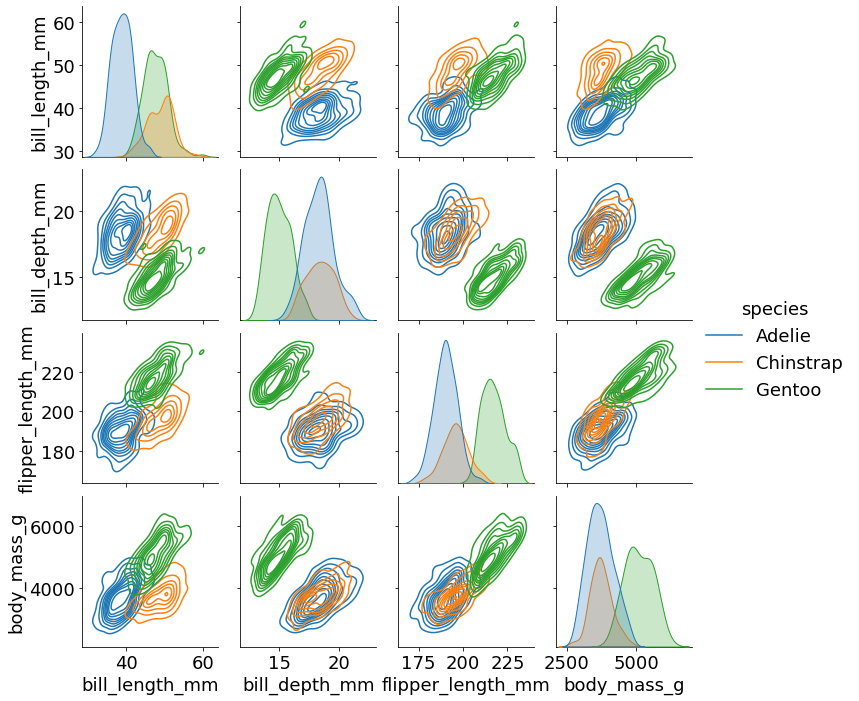

In [365]:
sns.pairplot(df, hue="species", kind="kde")

In [366]:
new_df = df[['flipper_length_mm', 'body_mass_g']]
new_df

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
338,214.0,4925.0
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


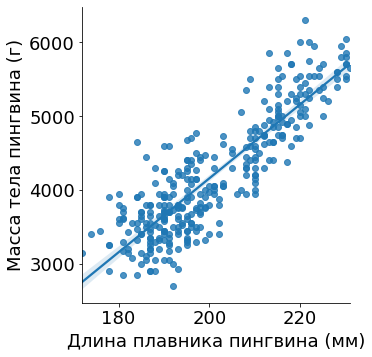

In [367]:
g = sns.lmplot(data=new_df, x="flipper_length_mm", y="body_mass_g",height=5)
g.set_axis_labels("Длина плавника пингвина (мм)", "Масса тела пингвина (г)")

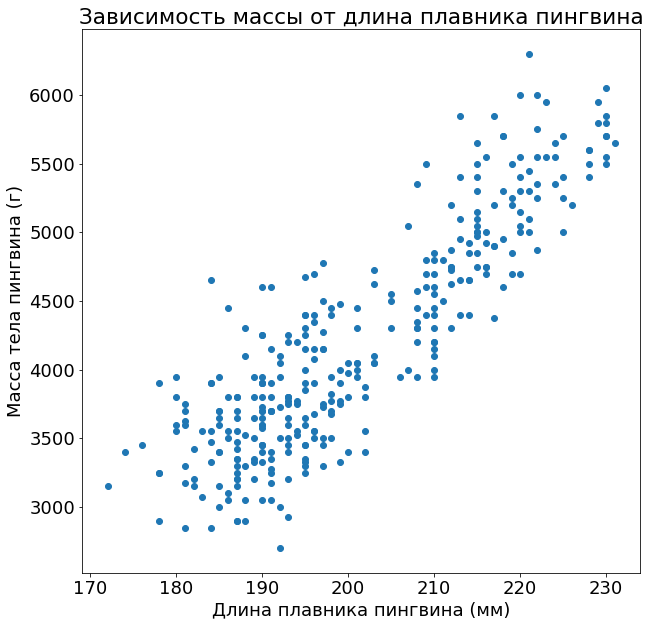

In [368]:
plt.figure(figsize=(10, 10))
plt.title('Зависимость массы от длина плавника пингвина')
plt.xlabel('Длина плавника пингвина (мм)')
plt.ylabel('Масса тела пингвина (г)')
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])

In [369]:
def plot_line_on_data(data_x, data_y, label_x, label_y, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.scatter(data_x, data_y)
    plt.show()

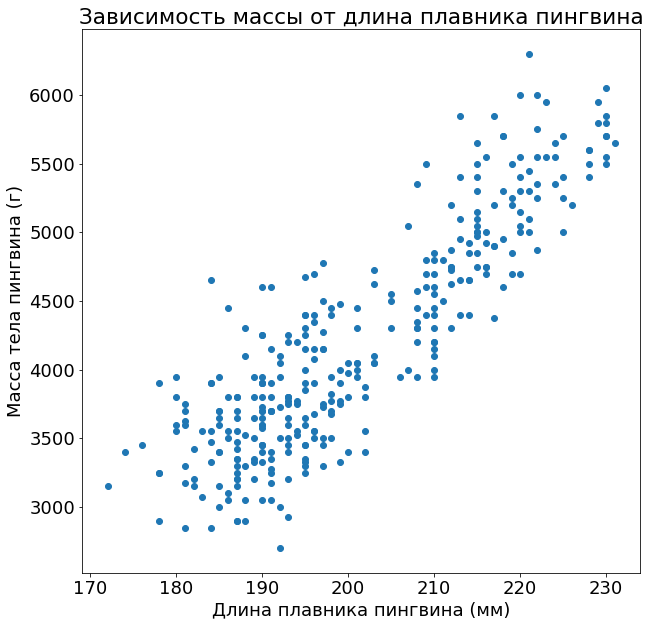

In [370]:
plot_line_on_data(df['flipper_length_mm'], df['body_mass_g'], 'Длина плавника пингвина (мм)', 'Масса тела пингвина (г)', 'Зависимость массы от длина плавника пингвина')

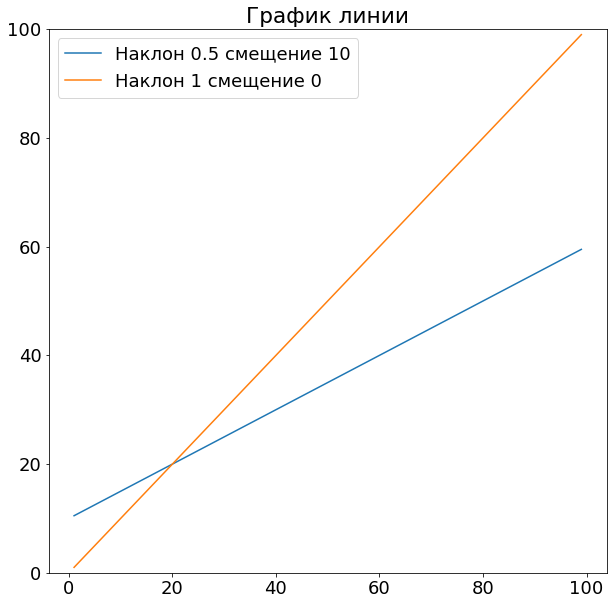

In [371]:
plt.figure(figsize=(10, 10))
plt.title('График линии')
plt.ylim((0, 100))

a = 0.5 # наклон
b = 10 # смещение
x = np.arange(1, 100) # данные на вход
y = b + x*a # поэлементно умножаем на наклон и поэлементно добавляем смещение
plt.plot(x, y, label = f'Наклон {a} смещение {b}')

a = 1 # наклон
b = 0 # смещение
x = np.arange(1, 100) # данные на вход
y = b + x*a # поэлементно умножаем на наклон и поэлементно добавляем смещение
plt.plot(x, y, label = f'Наклон {a} смещение {b}')

plt.legend()

Уравнение линии определяют 2 параметра, смещение и наклон. Мы определяем их как $a$ и $b$, но чаще их можно увидеть как $w_1$ и $w_0$.

Т.е. вместо $y = ax +b$ будет запись $y = w_0 + w_1 x$

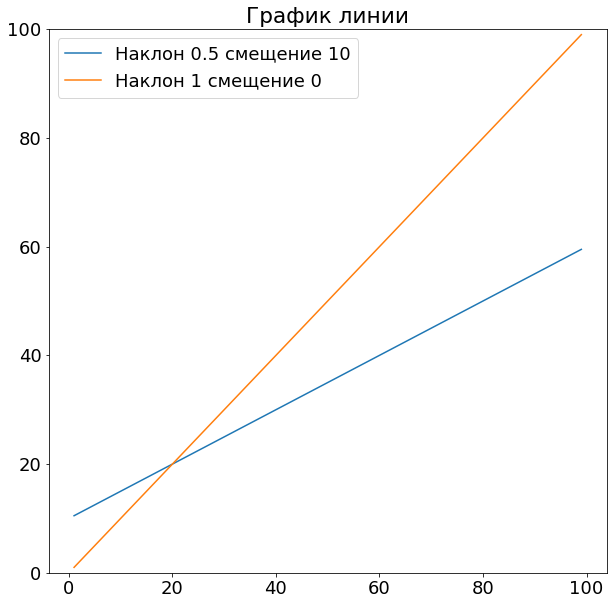

In [372]:
# все тот же код, только название переменных поменялись
plt.figure(figsize=(10, 10))
plt.title('График линии')
plt.ylim((0, 100))

w1 = 0.5 # наклон
w0 = 10 # смещение

x = np.arange(1, 100) # данные на вход
y = w0 + w1*x # поэлементно умножаем на наклон и поэлементно добавляем смещение (прогноз)
plt.plot(x, y, label = f'Наклон {w1} смещение {w0}')

w1 = 1 # наклон
w0 = 0 # смещение

x = np.arange(1, 100) # данные на вход
y = w0 + w1*x # поэлементно умножаем на наклон и поэлементно добавляем смещение (прогноз)
plt.plot(x, y, label = f'Наклон {w1} смещение {w0}')

plt.legend()

Почему обозначение через $w$? Так проще задавать **веса** (параметры) нашей модели вне зависимости от количества входов.

Так в случае одного признака $[w_0, w_1]$ задаем $y = w_0 + w_1\cdot x$

В случае двух признаков $[w_0, w_1, w_2]$ - все аналогично, свободный член смещения и цифра, на которую мы домножаем каждую точку этого признака: $y = w_0 + w_1\cdot x_1 + w_2\cdot x_2$

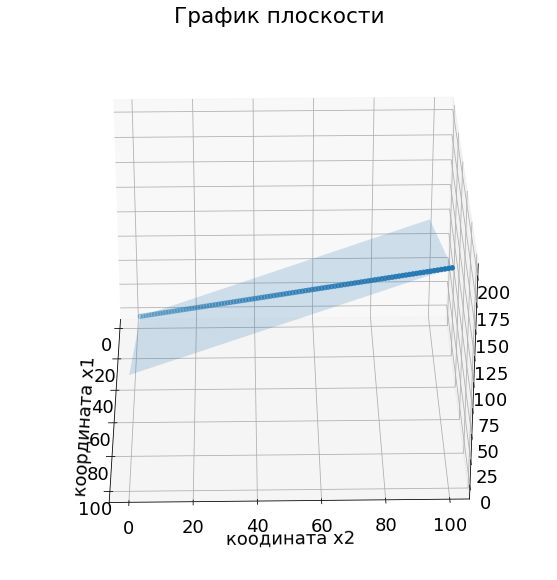

In [373]:
w1 = 1 # наклон вдоль x1
w2 = 1 # наклон вдоль x2
w0 = 0 # смещение

x1 = np.arange(1, 100) # данные на вход по первому признаку
x2 = np.arange(1, 100) # данные на вход по второму признаку

y = w0 + w1*x + w2*x # поэлементно умножаем на наклон каждый признак и поэлементно добавляем смещение (прогноз)


# это функции, которые создают координатную сетку
# это нужно только для красоты, чтоб нарисовать плоскость поверх точек
ww1, ww2 = np.meshgrid(x1, x2)
yy = w0 + ww1 + ww2

for angle in range(0,360): 
    ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
    plt.title('График плоскости')
    plt.xlabel('координата х1')
    plt.ylabel('коодината х2')

    ax.plot_surface(ww1, ww2, yy, alpha=0.2)
    
    ax.scatter(x1, x2, y)
    ax.view_init(30, angle)
    plt.show()
    clear_output(wait=True)

Теперь построим линию поверх данных о пингвинах. Переопределим нашу старую функцию, визуализирующую только данные и добавим возможность строить $w_0 + w_1\cdot x$.

Для удобства будем подавать $w_0, w_1$ в виде списка (вектора) $[w_0, w_1]$

In [374]:
def plot_line_on_data(data_x, data_y, label_x, label_y, title, W):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.scatter(data_x, data_y)

    x = np.arange(min(data_x), max(data_x)) # данные для отрисовки линии
    y = W[0] + W[1]*x # поэлементно умножаем на наклон и поэлементно добавляем смещение
    plt.plot(x, y, label = f'Наклон {W[1]} смещение {W[0]}')
    plt.legend()
    plt.show()

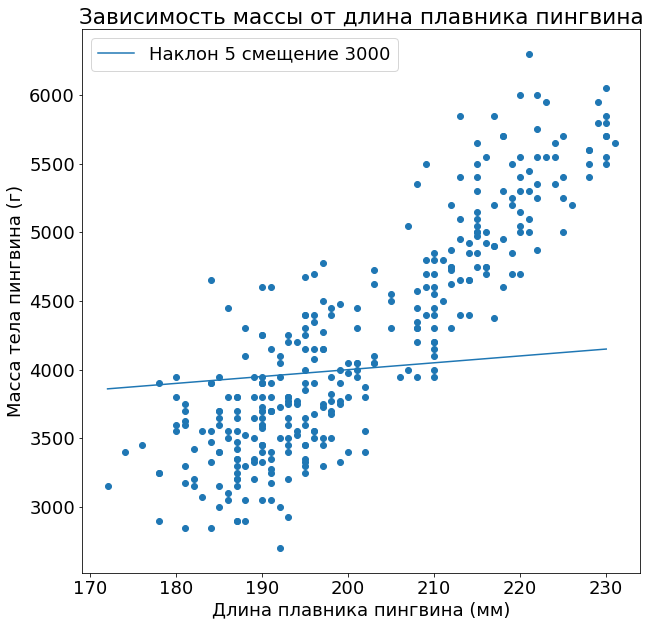

In [375]:
plot_line_on_data(df['flipper_length_mm'],
                  df['body_mass_g'],
                  'Длина плавника пингвина (мм)',
                  'Масса тела пингвина (г)',
                  'Зависимость массы от длина плавника пингвина',
                  [3000, 5]) # коэффициенты наклона я прикинул на глаз, наша задача - найти их

# реальная задача 

В этой части мы будем работать с датасетом цен на дома в Мельбурне: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [376]:
!gdown --id 1auxfozJgbG4-dmYxto9wSvKeZ01SyD1y
!gdown --id 1M_YvMJQSLzIskH7iCtiuHO-TLYPqB_Kr

Downloading...
From: https://drive.google.com/uc?id=1auxfozJgbG4-dmYxto9wSvKeZ01SyD1y
To: C:\Users\User\Desktop\test.csv

  0%|          | 0.00/451k [00:00<?, ?B/s]
100%|##########| 451k/451k [00:00<00:00, 3.68MB/s]
100%|##########| 451k/451k [00:00<00:00, 3.68MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M_YvMJQSLzIskH7iCtiuHO-TLYPqB_Kr
To: C:\Users\User\Desktop\train.csv

  0%|          | 0.00/461k [00:00<?, ?B/s]
100%|##########| 461k/461k [00:00<00:00, 4.44MB/s]
100%|##########| 461k/461k [00:00<00:00, 4.44MB/s]


In [377]:
data = pd.read_csv("train.csv")


In [378]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Загрузка данных

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [380]:

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [381]:
answer = data['SalePrice']
data = data.drop(columns=['SalePrice'])

In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

df train имеет 81 колонку (79 признаков + id и целевую переменную SalePrice) и 1460 объектов (число строк или заключенных сделок)
df test имеет 80 колонок (79 признаков + id) и 1459 объектов
Мы имеем много информации, которая, вероятно, связана с SalePrice, например, о районе, состоянии и качестве дома. Возможно, некоторые признаки не так важны для прогнозирования таргета, также возможна сильная корреляция между самими признаками (например, GarageCars и GarageArea). Для некоторых столбцов отсутствуют многие значения: только 7 значений для Pool QC в train_df и 3 в test_df

##  Деление выборки на train и test

В этом датасете заранее выборка не поделена на train и test. Нужно сделать это самим.

Никогда нельзя осуществлять предобработку данных на всем датасете до деления его на трейн и тест. Это нужно, чтобы избежать любого, даже косвенного использования информации из трейна в тестовом датасете.

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
X_train, X_test, y_train, y_test = train_test_split(data, answer, test_size=0.2) # test_size — какая доля данных пойдет в тестовую выборку

Зачем вообще нужен train_test_split: почему нельзя просто разбить выборку на X_train и X_test, взяв 80% первых строк из data в X_train, а остальные оставить на X_test?

Ответ такой: train_test_split делит выборку так, чтобы по каждому признаку и целевой переменной распределения тренировочной части и тестовой части были одинаковы. Чтобы обучающая выборка была "такая же", как тестовая: содержала ту же долю мужчин/женщин и т.п.

Давайте убедимся, что train_test_split делит выборку на train и test так, чтобы распределения были одинаковы: построим гистограммы признаков.

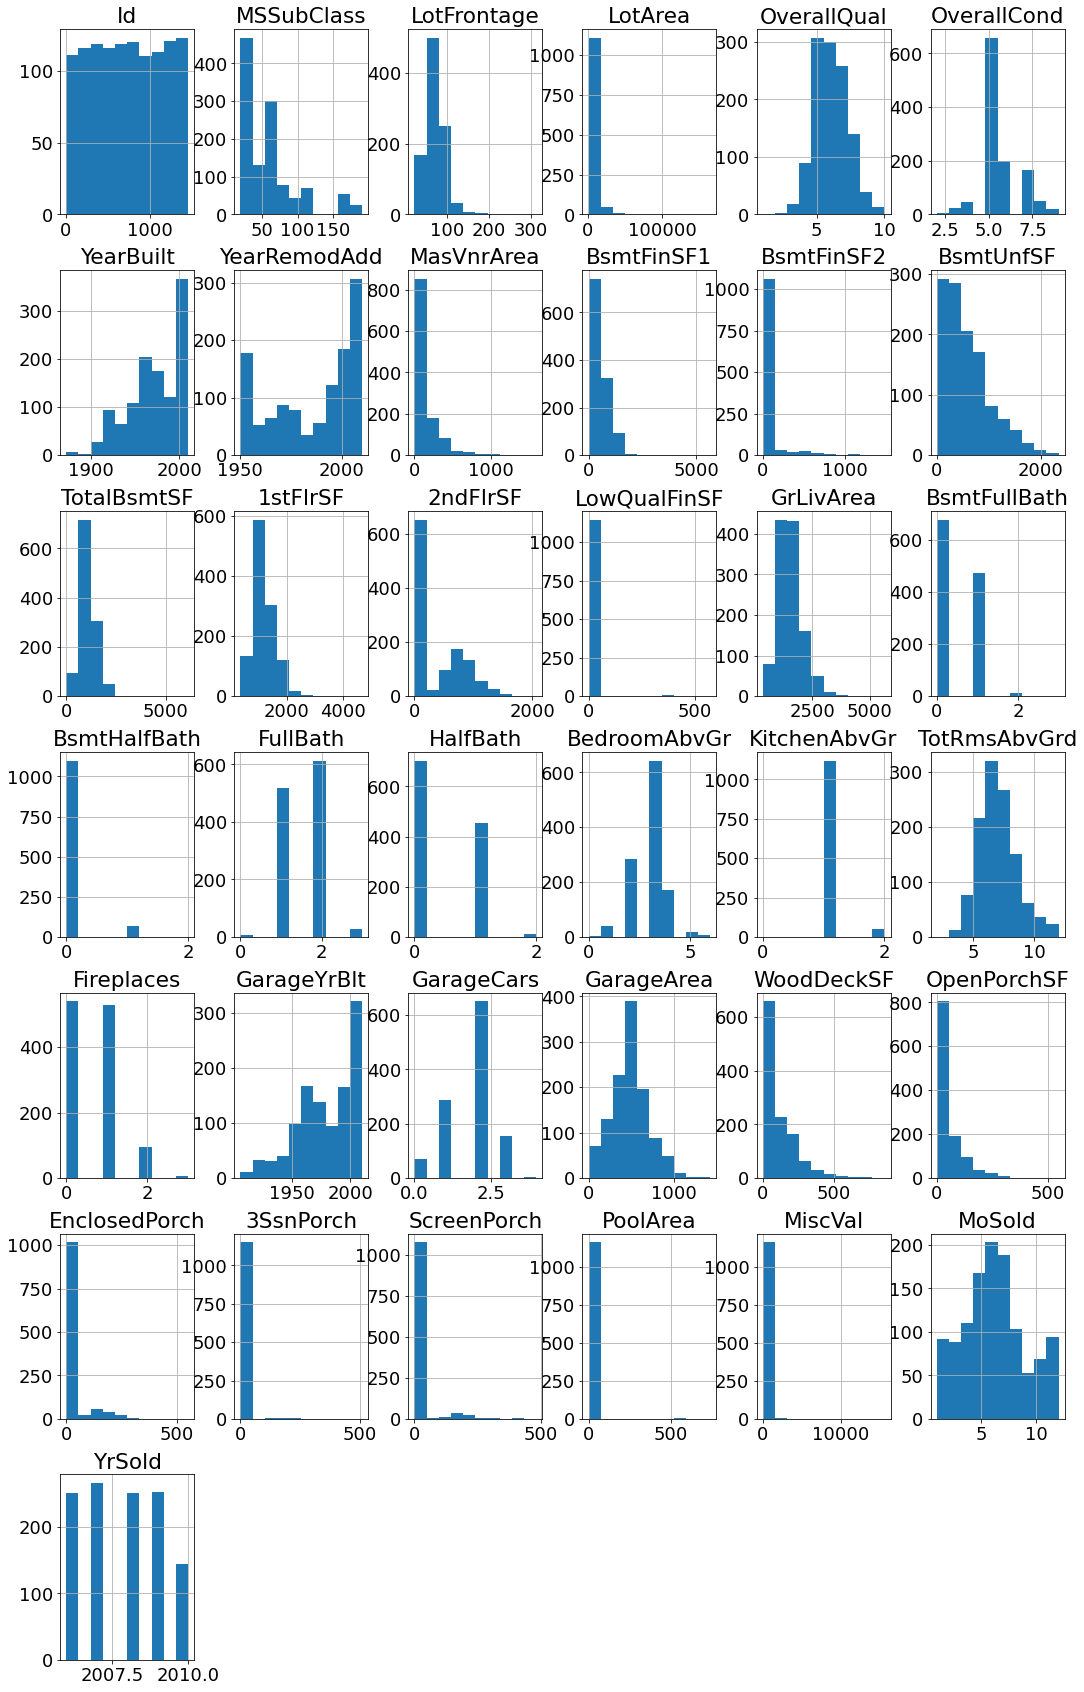

In [385]:
X_train.hist(figsize=(18, 30));

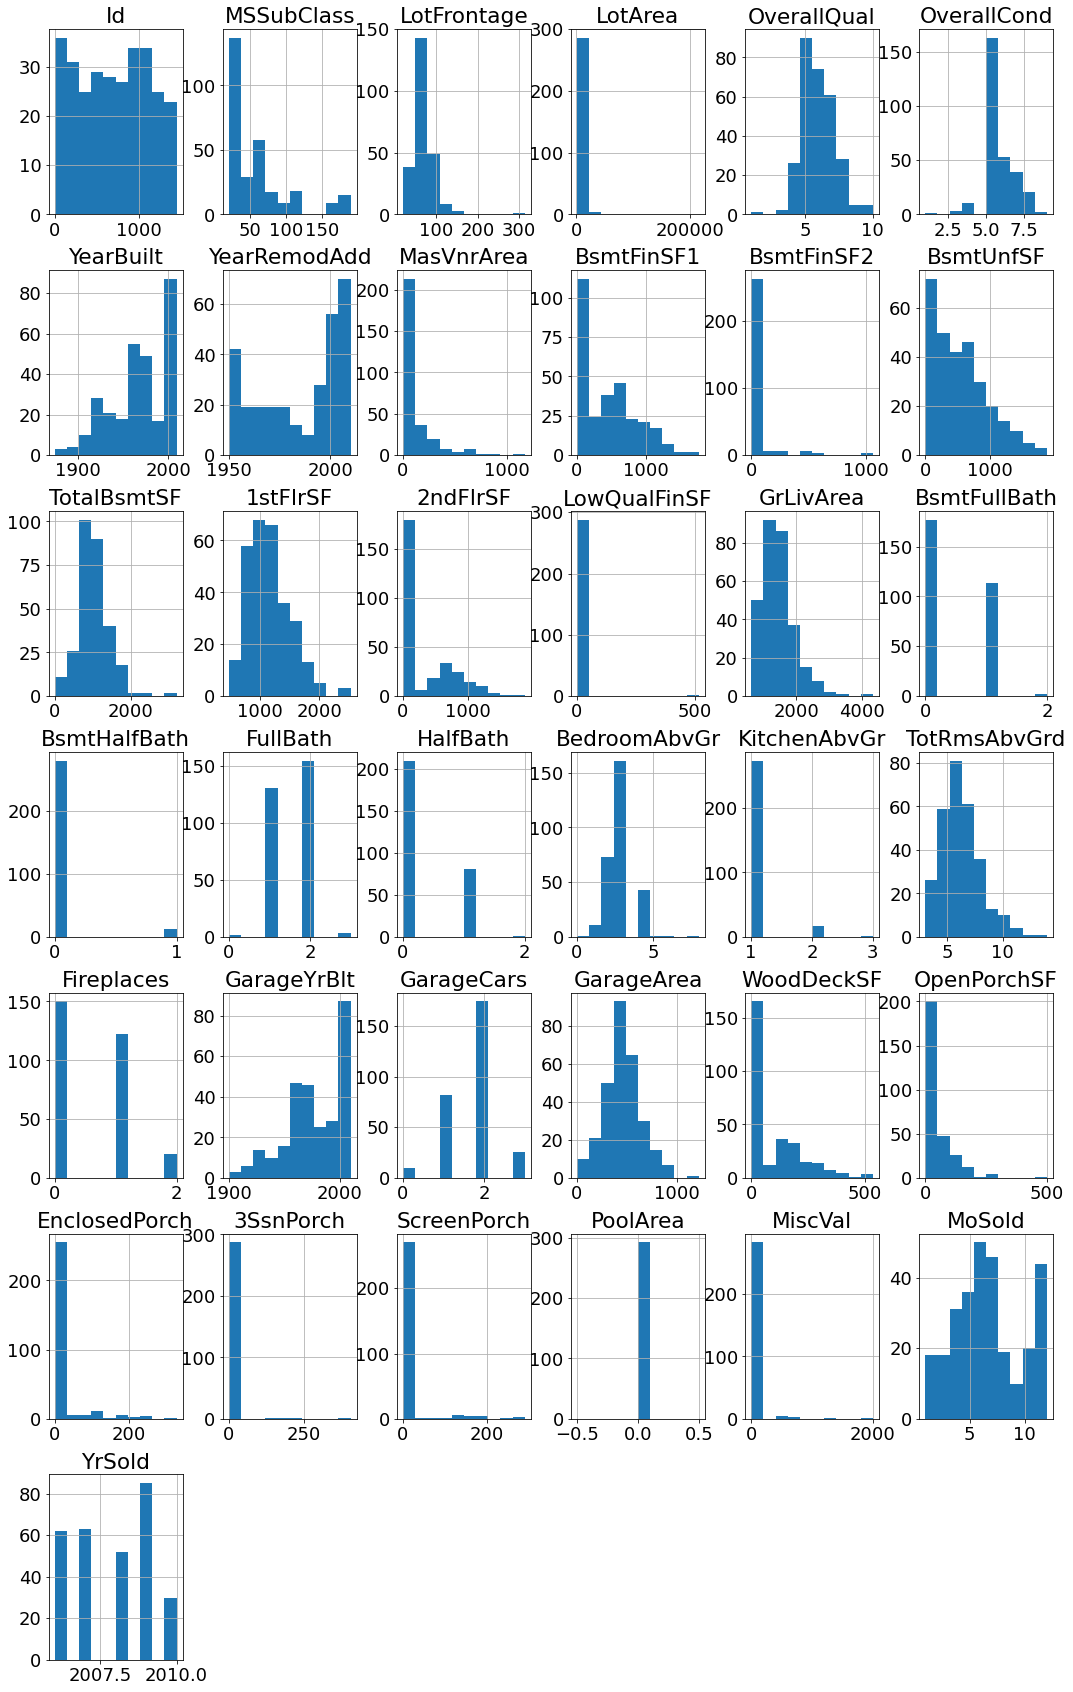

In [386]:
X_test.hist(figsize=(18, 30));

Далее предобрабатывать мы будем только тренировочные данные (X_train). После того, как предобработаем X_train и обучим модели, предобработаем и X_test.

Нельзя исследовать предобработку данных сразу на X_train и X_test, во избежание использования любой, даже косвенной информации из X_test во время решения, как предобработать X_train.

## Предобработка признаков:

### Работа с пропусками

Прежде чем обучать сеть и обрабатывать признаки, нужно заполнить пропуски в столбцах. Никакой (почти) алгоритм машинного обучения не умеет работать с данными с пропусками. 

Посмотрим, в каких столбцах есть пропуски:

In [387]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 828 to 688
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    959 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          69 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overall

# числовые и категориальные признаки

In [388]:
numerical_feats = X_train.dtypes[X_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = X_train.dtypes[X_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


In [389]:
print(X_train[numerical_feats].columns)
print("*"*100)
print(X_train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Bs

# список признаков с пропусками

In [390]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1161,0.994007
MiscFeature,1124,0.962329
Alley,1099,0.940925
Fence,954,0.816781
FireplaceQu,540,0.462329
LotFrontage,209,0.178938
GarageType,71,0.060788
GarageYrBlt,71,0.060788
GarageQual,71,0.060788
GarageCond,71,0.060788


**Заполнение пропусков**  
Для некоторых признаков мы наблюдаем большое число пропусков.  
Тем не менне, чтение описания данных позволяет нам заполнить некоторые пропуски:  
для PoolQC, NaN это не пропущенное значение, а отсутвие бассейна. 

In [391]:
# Список признаков NaN в которых имеет какое-то значение
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# Заменим NaN на None
for col in cols_fillna:
    X_train[col].fillna('None',inplace=True)
    X_test[col].fillna('None',inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [392]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,209,0.178938
GarageYrBlt,71,0.060788
MasVnrArea,7,0.005993
BedroomAbvGr,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000


In [393]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,50,0.171233
GarageYrBlt,10,0.034247
MasVnrArea,1,0.003425
BedroomAbvGr,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000


In [394]:
# В остальных данных заполним пропуски средним
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


#  Зависимость таргета (SalePrice) от признаков

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

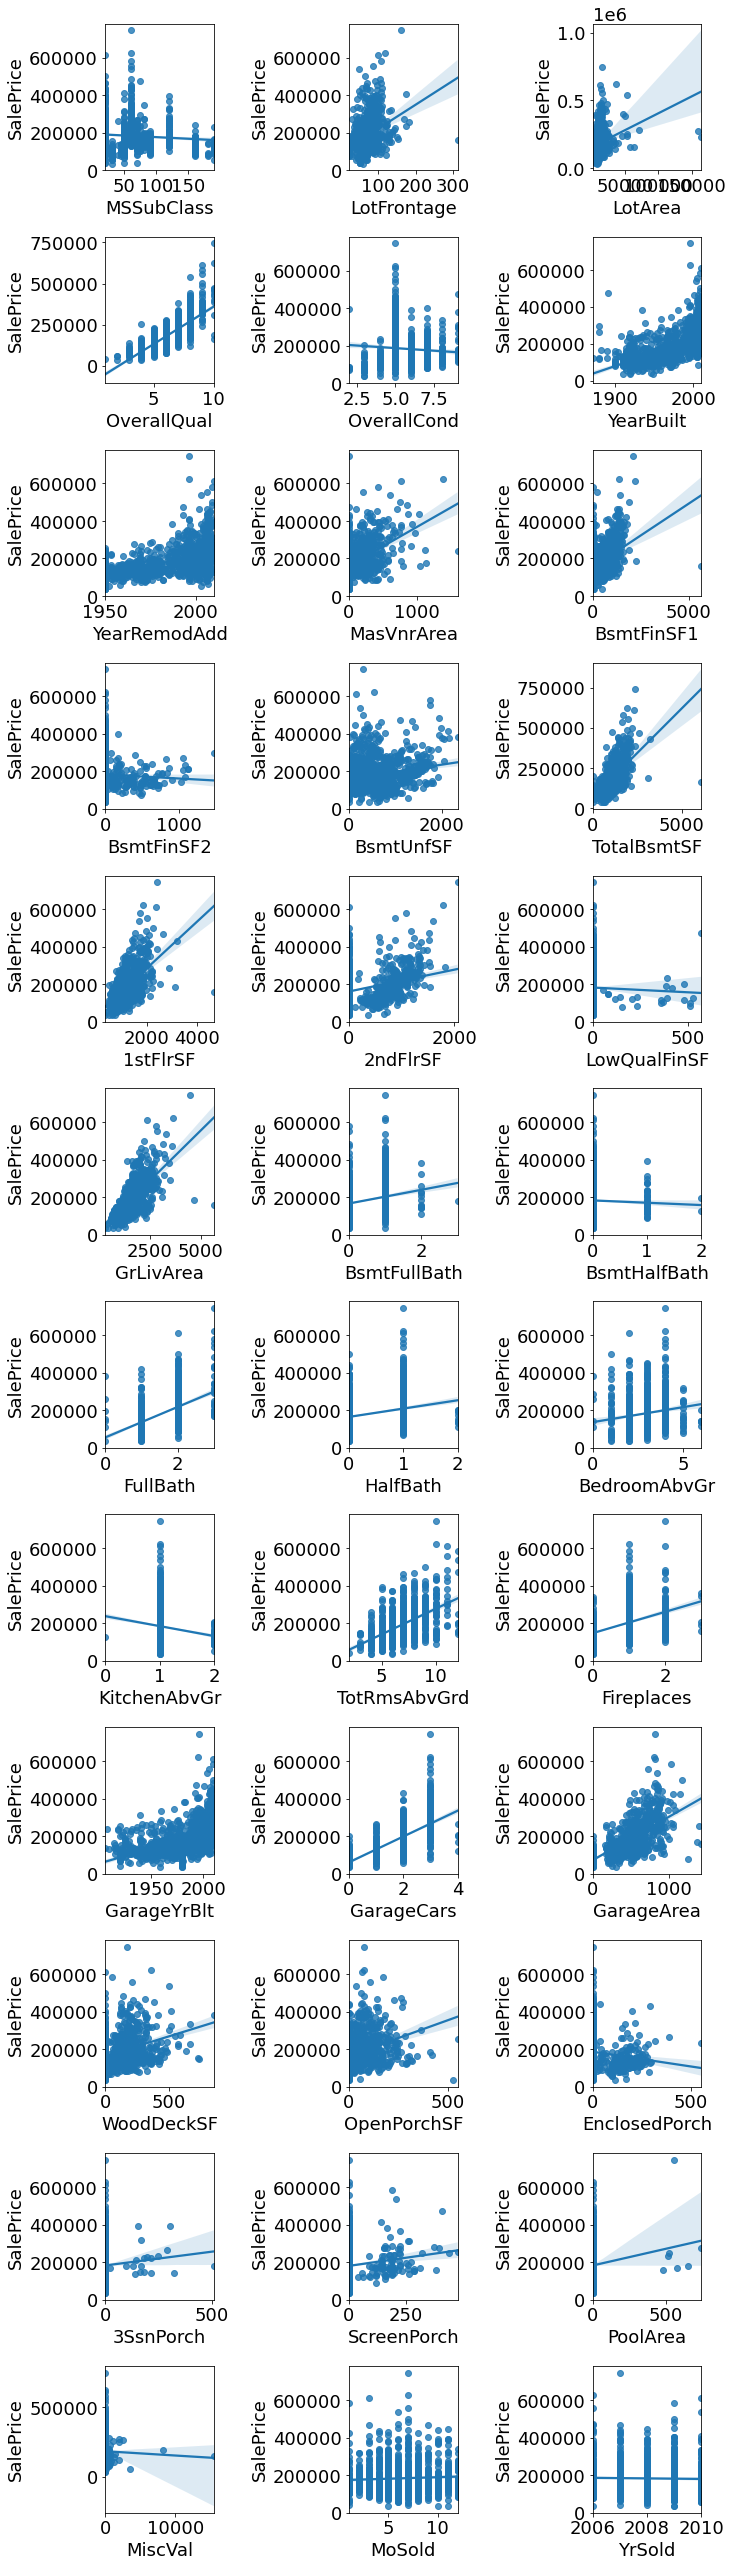

In [395]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(X_train[li_plot_num_feats[i]], y_train, ax = axs[r][c])
            
            
plt.tight_layout()    
plt.show()   

**Выводы по EDA числовых столбцов:**

Мы наблюдаем что для некоторых столбцов ("OverallQual"), существует сильная линейная корреляция с целевой переменной, а для других ("MSSubClass") оня очень слабая. В этом ноутбуке мы решили использовать для прогноза только признаки с сильной корреляцией (большей чем порог). Вот список признаков, которые мы уберем: 'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

In [396]:
df_concat = pd.concat([X_train , y_train] , axis =1)

In [397]:
df_concat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
828,829,60,RL,70.107404,28698,Pave,None,IR2,Low,AllPub,...,0,None,None,None,0,6,2009,WD,Abnorml,185000
542,543,20,RL,78.000000,10140,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2009,WD,Normal,213250
109,110,20,RL,105.000000,11751,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,1,2010,COD,Normal,190000
648,649,60,RL,70.000000,7700,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,155000
658,659,50,RL,78.000000,17503,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2010,WD,Abnorml,97500


In [398]:
corr = df_concat.corr()
corr_abs = corr.abs()

min_val_corr = 0.4

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

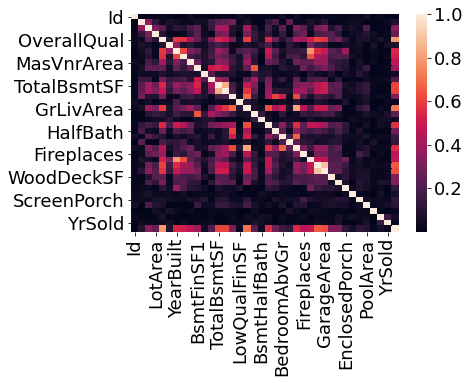

In [399]:
_=sns.heatmap(corr_abs)

# Список числовых признаков и их корреляций с целевой переменной

In [400]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

SalePrice        1.000000
OverallQual      0.790484
GrLivArea        0.708242
GarageCars       0.654669
GarageArea       0.636051
TotalBsmtSF      0.608262
1stFlrSF         0.603894
FullBath         0.559623
TotRmsAbvGrd     0.549873
YearBuilt        0.536914
YearRemodAdd     0.515494
GarageYrBlt      0.476308
MasVnrArea       0.469244
Fireplaces       0.457958
BsmtFinSF1       0.392837
LotFrontage      0.340269
WoodDeckSF       0.328776
OpenPorchSF      0.317540
2ndFlrSF         0.316144
HalfBath         0.281002
LotArea          0.265725
BsmtFullBath     0.237125
BsmtUnfSF        0.206944
BedroomAbvGr     0.161790
KitchenAbvGr     0.132172
ScreenPorch      0.122965
EnclosedPorch    0.122254
PoolArea         0.099819
MSSubClass       0.088467
OverallCond      0.076489
MoSold           0.053054
3SsnPorch        0.052351
BsmtFinSF2       0.043278
BsmtHalfBath     0.037831
LowQualFinSF     0.030772
YrSold           0.024124
MiscVal          0.021007
Name: SalePrice, dtype: float64
******

# Список категориальных признаков и их уникальные значения

In [401]:
for catg in list(categorical_feats) :
    print(X_train[catg].value_counts())
    print('#'*50)

RL         930
RM         168
FV          49
RH          12
C (all)      9
Name: MSZoning, dtype: int64
##################################################
Pave    1162
Grvl       6
Name: Street, dtype: int64
##################################################
None    1099
Grvl      40
Pave      29
Name: Alley, dtype: int64
##################################################
Reg    729
IR1    396
IR2     34
IR3      9
Name: LotShape, dtype: int64
##################################################
Lvl    1046
Bnk      51
HLS      41
Low      30
Name: LandContour, dtype: int64
##################################################
AllPub    1168
Name: Utilities, dtype: int64
##################################################
Inside     851
Corner     204
CulDSac     76
FR2         34
FR3          3
Name: LotConfig, dtype: int64
##################################################
Gtl    1104
Mod      56
Sev       8
Name: LandSlope, dtype: int64
##################################################
N

# Зависимость категориальных признаков и таргета

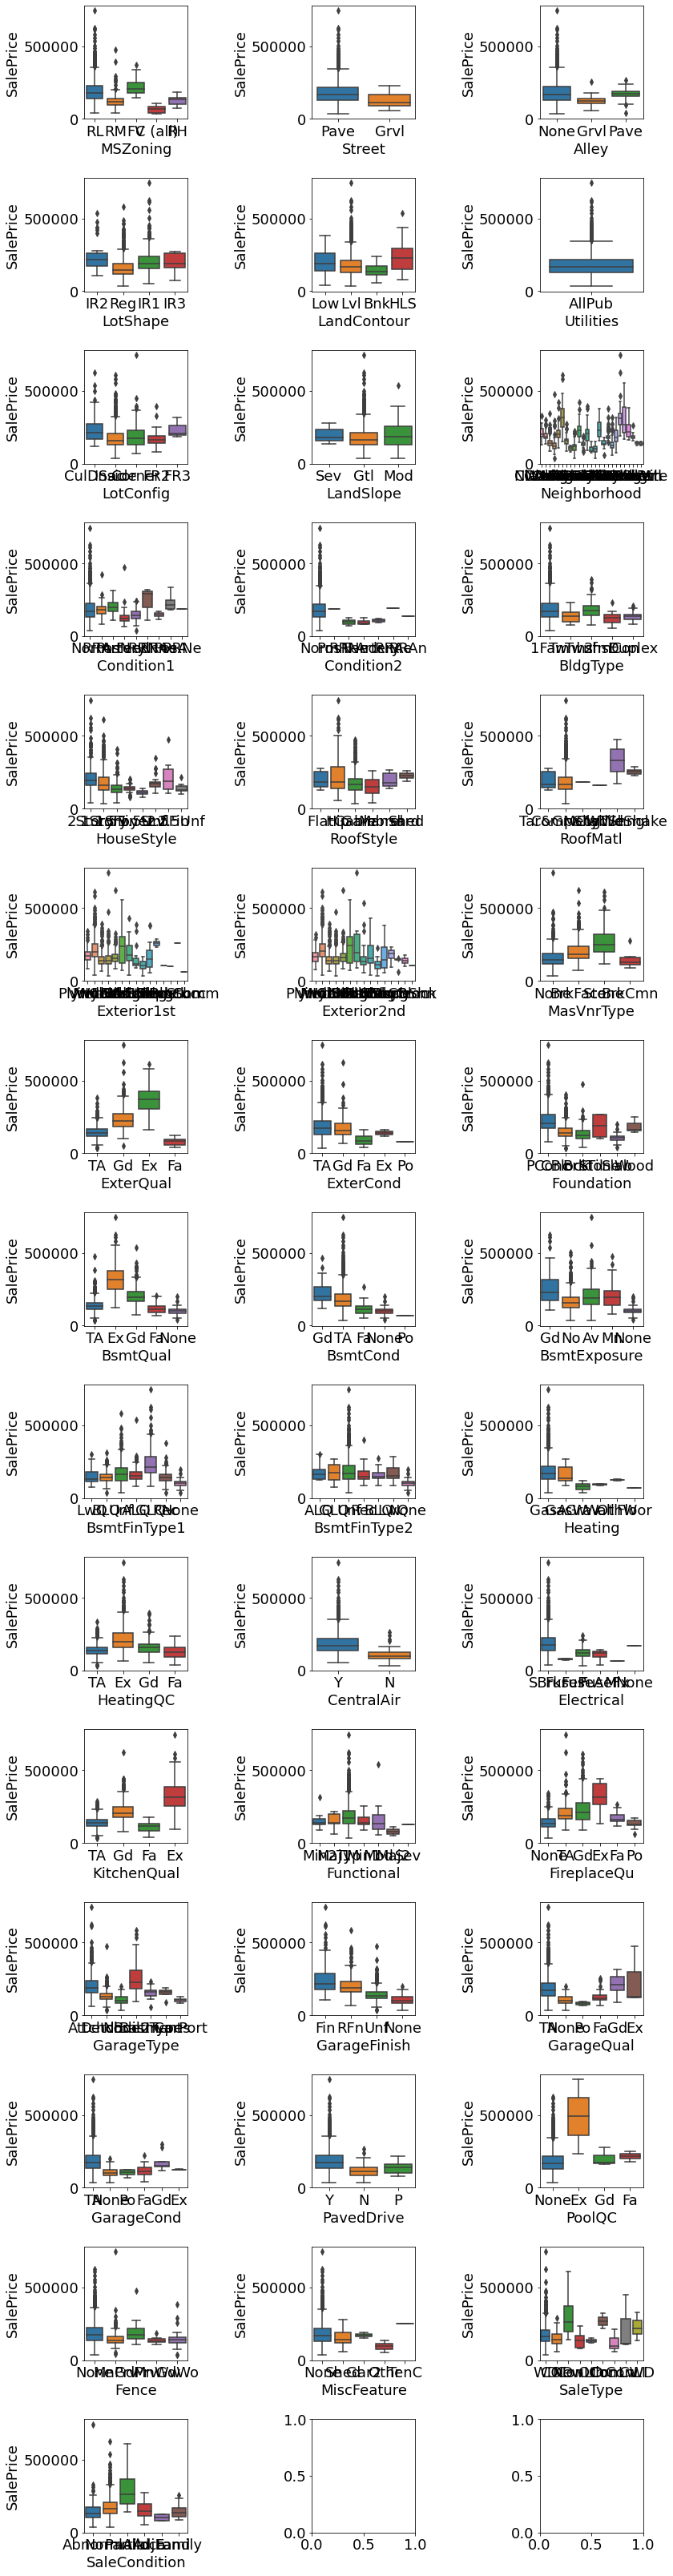

In [402]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=df_concat, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

**Выводы по EDA категориальных столбцов:**

Для многих категриальных признаков нет сильной корреляции с целевой переменной.
Однако для некоторых легко найти сильную связь.
На рисунках выше это: 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'

Также для категориальных признаков используем только те, которые сильно связаны с SalePrice.

Таким образом, другие столбцы удаляются при обучении моделей машинного обучения в Части 2: 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'

In [403]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [404]:
#Удаление столбцов со слабой корреляцией

id_test = df_test['Id']

to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [X_train, X_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)


C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


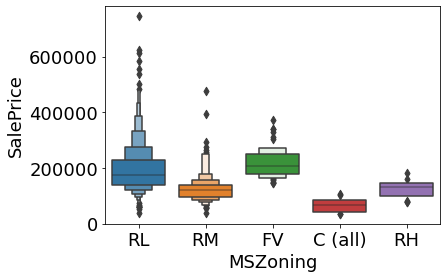

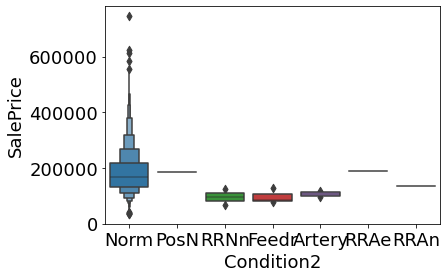

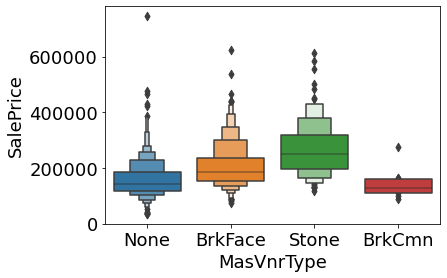

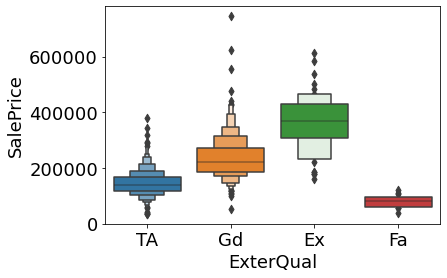

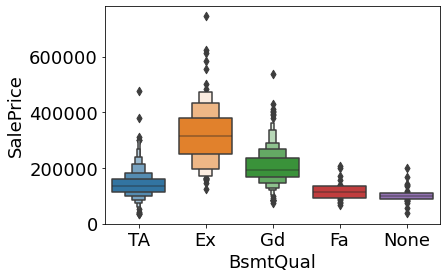

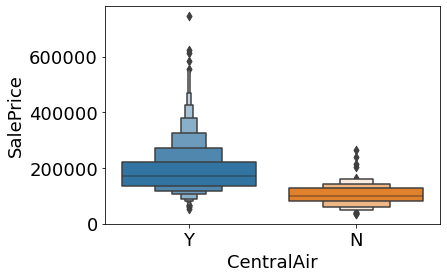

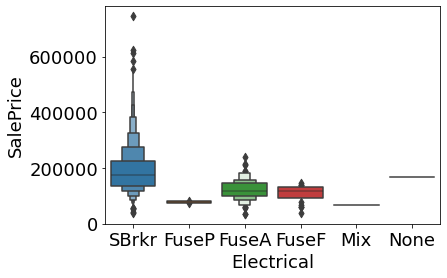

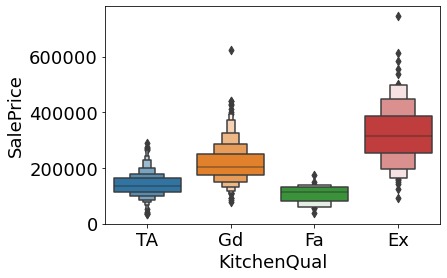

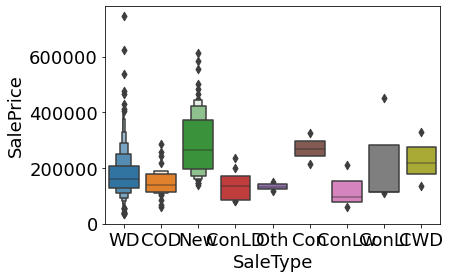

In [405]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')
target = 'SalePrice'
for catg in catg_list :
    #sns.catplot(x=catg, y=target, data=df_concat, kind='boxen')
    #sns.violinplot(x=catg, y=target, data=df_concat)
   
    sns.boxenplot(x=catg, y=target, data=df_concat)
    #bp = df_concat.boxplot(column=[target], by=catg)
    
    plt.show()

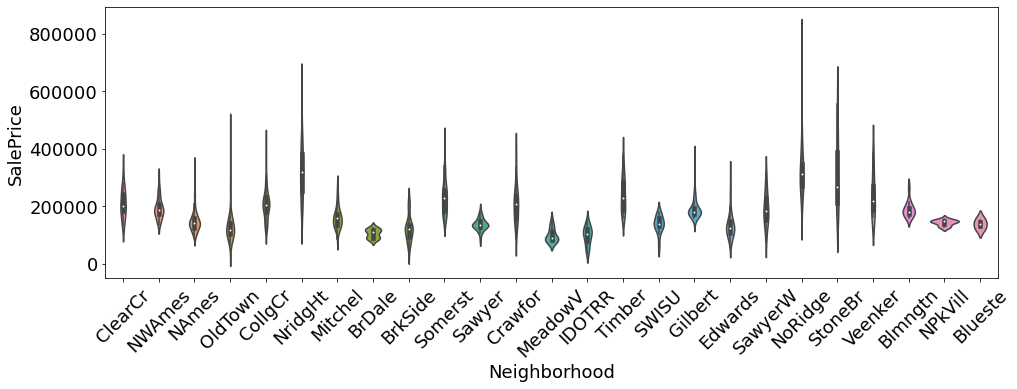

In [406]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=df_concat, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [407]:
for catg in catg_list :
    g = df_concat.groupby(catg)[target].mean()
    print(g)

MSZoning
C (all)     67931.111111
FV         219044.795918
RH         124541.666667
RL         193371.223656
RM         126164.845238
Name: SalePrice, dtype: float64
Condition2
Artery    106500.000000
Feedr      97166.666667
Norm      183644.518135
PosN      184750.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64
MasVnrType
BrkCmn     140533.727273
BrkFace    205977.651685
None       158425.364689
Stone      268401.500000
Name: SalePrice, dtype: float64
ExterQual
Ex    360141.113636
Fa     80899.416667
Gd    234870.270000
TA    144810.248596
Name: SalePrice, dtype: float64
BsmtQual
Ex      322857.453704
Fa      118116.840000
Gd      204348.687755
None    104999.961538
TA      141016.618497
Name: SalePrice, dtype: float64
CentralAir
N    105910.355263
Y    188480.604396
Name: SalePrice, dtype: float64
Electrical
FuseA    122589.250000
FuseF    107261.285714
FuseP     77500.000000
Mix       67000.000000
None     167500.000000


### Категориальные признаки

Сначала предобработаем категориальные признаки. Посмотрим, какие столбцы датасета — категориальные.

In [408]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 828 to 688
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1168 non-null   object 
 1   Neighborhood  1168 non-null   object 
 2   Condition2    1168 non-null   object 
 3   OverallQual   1168 non-null   int64  
 4   YearBuilt     1168 non-null   int64  
 5   YearRemodAdd  1168 non-null   int64  
 6   MasVnrType    1168 non-null   object 
 7   MasVnrArea    1168 non-null   float64
 8   ExterQual     1168 non-null   object 
 9   BsmtQual      1168 non-null   object 
 10  TotalBsmtSF   1168 non-null   int64  
 11  CentralAir    1168 non-null   object 
 12  Electrical    1168 non-null   object 
 13  1stFlrSF      1168 non-null   int64  
 14  GrLivArea     1168 non-null   int64  
 15  FullBath      1168 non-null   int64  
 16  KitchenQual   1168 non-null   object 
 17  TotRmsAbvGrd  1168 non-null   int64  
 18  Fireplaces    1168 non-null

Категориальные — те признаки, у которых Dtype=object. На самом деле, и в числовых признаках могут скрываться категориальные, но об этом мы поговорим позже. Первичная задача — предобработать признаки, у которых Dtype=object.

#### 1 способ: замена значений в столбце на числа

Занумеровать уникальные значения в столбце и заменить каждое значение на его номер. 

Пример: в столбце Neighborhood есть значения:

oldtown  $\ \ \ \ \ \ \ \ $        1         
StoneBR    $\ \ \ \ \ \ \ $      2 \\
...

Занумеровать значения в столбце можно двумя спосбами. 

1 способ: Руками:

In [409]:
from collections import defaultdict
# создаем словарь {'Reservoir' : 1, 'Richmond' : 2, ...}
dict_ = defaultdict(int)
for i, x in enumerate(np.unique(X_train.Neighborhood  )):
    dict_[x] = i+1

In [410]:
# к каждому значению в колонке Suburb применяем функцию, которая ставит этому значению в соответствие число из dict_
# про lambda-функции подробнее можно узнать тут: https://pythonru.com/osnovy/vse-chto-nuzhno-znat-o-lambda-funkcijah-v-python
X_train['Neighborhood'] = X_train['Neighborhood'].apply(lambda x: dict_[x])
X_test['Neighborhood'] = X_test['Neighborhood'].apply(lambda x: dict_[x])

<ipython-input-410-5faaf93819d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Neighborhood'] = X_train['Neighborhood'].apply(lambda x: dict_[x])
<ipython-input-410-5faaf93819d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Neighborhood'] = X_test['Neighborhood'].apply(lambda x: dict_[x])


Проверим, что получилось:

In [411]:
X_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType
828,RL,5,Norm,5,1967,1967,None,0.0,TA,TA,...,1160,2126,2,TA,7,0,1967.0,2,538,WD
542,RL,15,Norm,7,1998,1999,None,0.0,Gd,Ex,...,1680,1680,2,Gd,7,1,1998.0,2,583,WD
109,RL,15,Norm,6,1977,1977,BrkFace,480.0,TA,Gd,...,1844,1844,2,TA,7,1,1977.0,2,546,COD
648,RL,13,Norm,6,1966,1966,BrkFace,351.0,TA,TA,...,1051,1839,1,TA,7,1,1966.0,2,442,WD
658,RL,13,Norm,6,1948,1950,None,0.0,TA,TA,...,912,1458,1,TA,6,1,1948.0,1,330,WD


Видим, что колонка Neighborhood стала числовой, как и ожидалось.

**2 способ**, как можно перевести все значения в столбце в числа: использовать LabelEncoder из Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Так как колонку Neighborhood мы перевели в числа выше, давайте LabelEncoder применим к другому категориальному признаку: KitchenQual

In [412]:
from sklearn.preprocessing import LabelEncoder

In [413]:
# заводим LabelEncoder. Его же вы будете использовать для предобработки признака Method в тестовых данных
le = LabelEncoder()
# передаем le в fit нашу колонку, чтобы LabelEncoder занумеровал значения в ней
le.fit(X_train['KitchenQual'])

LabelEncoder()

Посмотрим, какие уникальные значения в колонках нашел LabelEncoder:

In [414]:
le.classes_

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

LabelEncoder занумеровал значения ровно в том порядке, в котором мы видим их выше. Вместо @Ex будет 0, вместо Fa — 1 и т.д.

Переведем теперь с помощью le нашу колонку SellerG в числа:

In [415]:
X_train['KitchenQual'] = le.transform(X_train['KitchenQual'])
X_test['KitchenQual'] = le.transform(X_test['KitchenQual'])

<ipython-input-415-fa69682a5ff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['KitchenQual'] = le.transform(X_train['KitchenQual'])
<ipython-input-415-fa69682a5ff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['KitchenQual'] = le.transform(X_test['KitchenQual'])


И посмотрим, что получилось:

In [416]:
X_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType
828,RL,5,Norm,5,1967,1967,None,0.0,TA,TA,...,1160,2126,2,3,7,0,1967.0,2,538,WD
542,RL,15,Norm,7,1998,1999,None,0.0,Gd,Ex,...,1680,1680,2,2,7,1,1998.0,2,583,WD
109,RL,15,Norm,6,1977,1977,BrkFace,480.0,TA,Gd,...,1844,1844,2,3,7,1,1977.0,2,546,COD
648,RL,13,Norm,6,1966,1966,BrkFace,351.0,TA,TA,...,1051,1839,1,3,7,1,1966.0,2,442,WD
658,RL,13,Norm,6,1948,1950,None,0.0,TA,TA,...,912,1458,1,3,6,1,1948.0,1,330,WD


In [417]:
X_test.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType
917,RL,8,Norm,4,1956,1956,None,0.0,TA,TA,...,1229,1229,1,3,6,0,1956.0,1,284,WD
651,RL,8,Norm,4,1940,1950,None,0.0,TA,TA,...,755,1510,1,3,7,1,1940.0,1,296,WD
273,RL,13,Norm,6,1958,1988,BrkCmn,183.0,TA,TA,...,1632,1632,2,3,6,1,1958.0,1,338,WD
1220,RL,13,Norm,5,1964,1964,None,0.0,TA,TA,...,912,912,1,3,5,0,1964.0,1,288,WD
162,RL,17,Norm,7,2005,2005,BrkFace,226.0,Gd,Gd,...,1541,1541,2,2,7,1,2005.0,2,532,New


Видим, что колонка KitchenQual теперь тоже числовая.

#### 2 способ: бинаризация

Второй способ обработать категориальные признаки — бинаризация. При бинаризации из одного столбца с несколькими категориальными значениями получается несколько новых бинарных столбцов, значения в которых — 0 и 1.

Пример: Пусть у нас в данных есть категориальный признак Education, и в нем три уникальных значения — 'high school', 'university' и 'PhD'. При бинаризации вместо колонки Education появится три новые колонки: Education_high_school, Education_university и Education_phd. В колонке Education_high_school будут единицы в тех строках, в которых в колонке Education было значение 'high school', а в остальных строках будут 0. Аналогично для двух других колонок.

Бинаризовать колонки можно с помощью метода get_dummies библиотеки pandas: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

Давайте бинаризуем колонку MSZoning. Вот что получится из одной колонки после бинаризации. Получится 5 новых колонок, т.к. в Regionname было 5 уникальных значений.

In [418]:
pd.get_dummies(X_train['MSZoning'])

,C (all),FV,RH,RL,RM
828,0,0,0,1,0
542,0,0,0,1,0
109,0,0,0,1,0
648,0,0,0,1,0
658,0,0,0,1,0
...,...,...,...,...,...
1327,0,0,0,1,0
239,0,0,0,1,0
443,0,0,0,1,0
908,0,0,0,1,0


Чтобы заменить колонку MSZoning на эти 5 новых колонок в X_train, нужно передать get_dummies весть X_train и указать список колонок, которые нужно бинаризовать:

In [419]:
X_train = pd.get_dummies(X_train, columns=['MSZoning'])
X_test = pd.get_dummies(X_test, columns=['MSZoning'])

Посмотрим, что получилось:

In [420]:
X_train.head()

,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
828,5,Norm,5,1967,1967,None,0.0,TA,TA,1013,...,0,1967.0,2,538,WD,0,0,0,1,0
542,15,Norm,7,1998,1999,None,0.0,Gd,Ex,1650,...,1,1998.0,2,583,WD,0,0,0,1,0
109,15,Norm,6,1977,1977,BrkFace,480.0,TA,Gd,1844,...,1,1977.0,2,546,COD,0,0,0,1,0
648,13,Norm,6,1966,1966,BrkFace,351.0,TA,TA,756,...,1,1966.0,2,442,WD,0,0,0,1,0
658,13,Norm,6,1948,1950,None,0.0,TA,TA,912,...,1,1948.0,1,330,WD,0,0,0,1,0


Видим, что колонка MSZoning исчезла, и появились новые 5 колонок. 

Применим тот же подход ко всем остальным колонкам

In [421]:
categorical_feats = X_train.dtypes[X_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Categorical features:  7


In [422]:
X_train_dum = pd.get_dummies(X_train, columns=categorical_feats)
X_test_dum = pd.get_dummies(X_test, columns=categorical_feats)

In [423]:
set(X_train_dum.columns) - set(X_test_dum.columns)

{'Condition2_Artery',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Electrical_None',
 'SaleType_Con'}

In [424]:
from sklearn.preprocessing import OneHotEncoder

In [438]:
one_hot_encoder = OneHotEncoder(  handle_unknown = 'ignore')

In [439]:
others_columns = list(X_train.columns) 
for i in categorical_feats:
    others_columns.remove(i)

In [440]:
columns_to_change

Index(['Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir',
       'Electrical', 'SaleType'],
      dtype='object')

In [441]:
columns_to_change = categorical_feats


In [442]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
points_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change)

In [443]:
points_onehot = pd.DataFrame(points_onehot, index=X_train.index, columns=column_names)

In [444]:
# соединяем новую табличку с исходной
points_new = pd.concat([X_train, points_onehot], axis=1)

# удаляем исходные неизменные признаки
X_train_onehot = points_new.drop(columns=columns_to_change)

In [446]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
points_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

points_onehot = pd.DataFrame(points_onehot, index=X_test.index, columns=column_names)
# соединяем новую табличку с исходной
points_new = pd.concat([X_test, points_onehot], axis=1)

# удаляем исходные неизменные признаки
X_test_onehot = points_new.drop(columns=columns_to_change)

In [447]:
set(X_train_onehot.columns) - set(X_test_onehot.columns)

set()

In [448]:
 set(X_test_onehot.columns) - set(X_train_onehot.columns) 
    

set()

Отлично! Теперь можно обучать на этом датасете модели машинного обучения =)

# Стандартизация признаков 

In [449]:
X_test_onehot.describe()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,...,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,13.568493,5.996575,1968.267123,1984.595890,93.654829,1023.934932,1153.328767,1461.592466,1.551370,2.421233,...,0.914384,0.027397,0.003425,0.0,0.003425,0.006849,0.006849,0.082192,0.003425,0.866438
std,5.951589,1.355904,31.576078,20.703795,171.359967,430.361727,352.274848,503.215101,0.538004,0.757978,...,0.280277,0.163518,0.058521,0.0,0.058521,0.082618,0.082618,0.275128,0.058521,0.340765
min,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,483.000000,630.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,1951.000000,1965.000000,0.000000,793.000000,894.000000,1101.500000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,13.000000,6.000000,1970.500000,1994.000000,0.000000,975.500000,1101.500000,1384.000000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18.000000,7.000000,2000.000000,2003.000000,132.750000,1237.000000,1341.000000,1710.500000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,25.000000,10.000000,2009.000000,2010.000000,1170.000000,3206.000000,2524.000000,4316.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [494]:
from sklearn.preprocessing import StandardScaler

In [495]:
scaler = StandardScaler()
others_columns = ['Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea']

In [496]:
scaler.fit(X_test_onehot[others_columns])

StandardScaler()

In [509]:
X_train_onehot.describe()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,...,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,13.172089,6.125000,1972.017979,1984.933219,106.210164,1065.803082,1164.951199,1528.931507,1.568493,2.319349,...,0.913527,0.029966,0.002568,0.001712,0.006849,0.002568,0.002568,0.083904,0.001712,0.868151
std,6.029093,1.389072,29.816557,20.639120,182.783455,440.550247,394.807469,530.254553,0.554270,0.846325,...,0.281181,0.170566,0.050637,0.041363,0.082512,0.050637,0.050637,0.277363,0.041363,0.338472
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,1954.000000,1967.000000,0.000000,796.000000,881.500000,1137.750000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,13.000000,6.000000,1974.000000,1993.500000,0.000000,992.500000,1080.000000,1478.000000,2.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18.000000,7.000000,2000.250000,2004.000000,168.250000,1324.000000,1414.000000,1792.750000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,25.000000,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,5642.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [505]:
X_train_scaled = scaler.transform(X_train_onehot[others_columns])
scaled_data = pd.DataFrame(X_train_scaled, columns = others_columns , index=X_train.index)
X_train_scaled = pd.concat([scaled_data , X_train_onehot.drop(columns = others_columns)] , axis = 1)

In [506]:
X_test_scaled = scaler.transform(X_test_onehot[others_columns])
scaled_data = pd.DataFrame(X_test_scaled, columns = others_columns , index=X_test.index)
X_test_scaled = pd.concat([scaled_data , X_test_onehot.drop(columns = others_columns)] , axis = 1)

In [510]:
X_train_scaled.describe()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,...,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,-0.066719,0.094878,0.118992,0.016321,0.073395,0.097453,0.033049,0.134047,0.031882,-0.134646,...,0.913527,0.029966,0.002568,0.001712,0.006849,0.002568,0.002568,0.083904,0.001712,0.868151
std,1.014762,1.026220,0.945898,0.998588,1.068495,1.025432,1.122661,1.055542,1.032003,1.118473,...,0.281181,0.170566,0.050637,0.041363,0.082512,0.050637,0.050637,0.277363,0.041363,0.338472
min,-2.115413,-3.691377,-3.053970,-1.673861,-0.547477,-2.383327,-2.329815,-2.244623,-2.888516,-3.199816,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.937238,-0.736251,-0.452609,-0.851346,-0.547477,-0.530545,-0.772963,-0.644652,-1.026603,-0.556686,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.095684,0.002530,0.181869,0.430810,-0.547477,-0.073168,-0.208515,0.032661,0.835310,-0.556686,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.745871,0.741311,1.014622,0.938834,0.436060,0.698436,0.741236,0.659213,0.835310,0.764878,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.924046,2.957655,1.323930,1.229133,8.805622,11.838405,10.062445,8.321658,2.697224,0.764878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Обучение моделей

Наща задача — задача регрессии. Для ее решения мы будем использовать такие модели машинного обучения, как линейная регрессия и случайный лес.

### Линейная регрессия

In [511]:
from sklearn.linear_model import LinearRegression

In [512]:
lr = LinearRegression()

In [514]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [536]:
y_predicted_linreg = lr.predict(X_test_scaled)

In [541]:
print(np.round(y_predicted_linreg[:5]))
print(y_test[:5].values)

[112907. 121799. 158484. 110331. 232604.]
[135000 108000 139000 115000 220000]


# KNN

In [531]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [534]:
# создадим списки чтобы запоминать историю 
train_MSE =[]  
test_MSE = []

K = 30 # максимальное число соседей
 
 # перебираем значения K в цикле
for k in range(1, K):                         
    # в этой строчке вам необходимо создать классификатор KNeighborsClassifier и указать ему аргумент n_neigbors = k
    KNN = KNeighborsRegressor(n_neighbors=k)
    # в этой строчке вам нужно обучить модель (fit)
    KNN.fit(X_train_scaled, y_train) 
    # в этой строчке вам с помощью обученной модели нужно сделать предсказание (predict) на тестовой части выборки (test)
    y_pred = KNN.predict(X_test_scaled) 
    # в этой строчке вам с помощью обученной модели нужно сделать предсказание (predict) на обучающей части выборки (train)
    y_train_pred = KNN.predict(X_train_scaled) 

    test_MSE.append(mean_squared_error(y_pred ,y_test))
    train_MSE.append(mean_squared_error(y_train_pred ,y_train))


Text(0, 0.5, 'Accuracy')

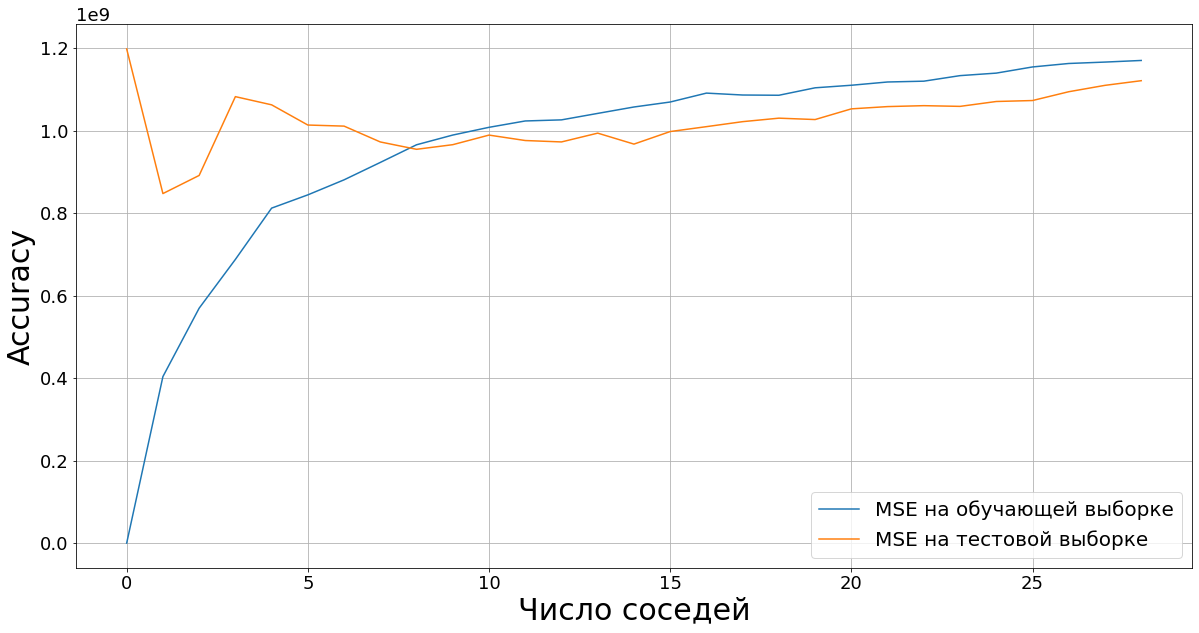

In [535]:
plt.figure(figsize=(20,10))
plt.plot(train_MSE , label = 'MSE на обучающей выборке')
plt.plot(test_MSE ,  label = 'MSE на тестовой выборке' )
plt.legend( fontsize = 20)
plt.grid()
plt.xlabel('Число соседей' , fontsize = 30 )
plt.ylabel('Accuracy' , fontsize = 30)

### Случайный лес

In [542]:
from sklearn.ensemble import RandomForestRegressor

In [543]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7)

In [544]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=7)

In [545]:
y_predicted_rf = rf.predict(X_test_scaled)

In [547]:
print(np.round(y_predicted_rf[:5]))
print(y_test[:5].values)

[132834. 139398. 161374. 123484. 229500.]
[135000 108000 139000 115000 220000]


Мы обучили модели машинного обучения на тренировочных данных. Чтобы можно было тестировать эти модели на тестовых данных, тестовые данные нужно сначала предобработать точно так же, как тренировочные. 

## Допглавы предобработки признаков

### Генерация новых признаков

При предобработке датасета часто полезно не только обрабатывать существующие признаки, но и добавлять новые признаки и удалять ненужные. 

Не существует универсального алгоритма, какие признаки нужно удалить, и каким образом сгенерировать новые признаки. То, удалять признак или нет, и как получать новые признаки, зависит от вашего понимания данных. Если вы понимаете, что какой-то признак не несет много смысла и может только запутать модель — удаляйте. А если вам кажется, что новый признак, добавленный в датасет, поможет модели — добавляйте.

Примеры удаления и добавления признаков:

- **пример #1**. Допустим, вы решаете задачу кредитного скоринга: учите модель по информации о человеке понимать, дать человеку кредит или нет. Среди признаков в вашем датасете есть признаки "имя человека" и "количество домашних питомцев". Кажется, что эти признаки можно (и даже лучше) удалить из датасета, потому что они не имеют никакого отношения к тому, насколько вероятно человек вернет кредит. И модели эти признаки принять решение никак не помогут.

- **пример #2**. Допустим, вы решаете задачу предсказания сердечно-сосудистых заболеваний (ССЗ). И в вашем датасете есть признаки "рост" и "вес". Из этих двух признаков можно составить третий — ИМТ (индекс массы тела), который равен $\frac{Вес/2.205}{Рост^2/39.37^2}$. Возможно, с этим признаком в датасете модели будет проще вывести зависимость между параметрами человека и наличием у него ССЗ.

Часто не сразу понятно, будет ли тот или иной признак полезен модели при обучении. Например, сходу до конца неясно, будет ли признак ИМТ действительно полезен модели для предсказания ССЗ. Поэтому нужно ставить эксперименты: обучать и тестировать модель с и без признака, и смотреть, как модель ведет себя лучше. У вас может быть очень много идей разных признаков и очень много экспериментов. И это нормально: вспомните, дата саентист тратить больше 50% своего времени на обработку данных. 

Несмотря на то, что часто мы генерируем признаки, исходя из нашего понимания задачи и природы данных, некоторые автоматические методы генерации признаков все же существуют. 

В библитеке **sklearn** есть модуль preprocessing, в котором собраны методы для предобработки данных, в том числе и для генерации новых признаков. Со всеми методами этого модуля можете познакомиться в документации по ссылке: http://scikit-learn.org/stable/modules/preprocessing.html
А здесь мы рассмотрим один метод генерации новых признаков: класс **PolynomialFeatures**

**PolynomialFeatures** — метод, который принимает на вход **числовые** признаки и генерирует на их основе всевозможные полиномы из этих признаков до определенной степени (степень задается параметром degree). 
Например, если у нас в датасете есть два признака: $x$, $y$, и мы генерируем на их основе полиномиальные признаки до степени 2, то в результате получим 6 признаков: 

1 (колонка из всех единиц), $x$, $y$, $x^2$, $y^2$, $xy$. 

Если степень = 3, то получим уже 10 признаков: 

1, $x$, $y$, $x^2$, $y^2$, $xy$, $x^3$, $y^3$, $x^2y$, $xy^2$.

Давайте посмотрим, как это работает:

In [550]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False) # include_bias=False исключает колонку из всех единиц в полученном результате

Чтобы не плодить очень много признаков, давайте возьмем из нашего датасета два признака и получим из них полиномиальные признаки до степени 3:

In [551]:
X_train_slice = X_train[['Neighborhood', 'OverallQual']]
X_train_slice.head()

,Neighborhood,OverallQual
828,5,5
542,15,7
109,15,6
648,13,6
658,13,6


In [552]:
poly.fit(X_train_slice )

PolynomialFeatures(degree=3, include_bias=False)

Полученный результат:

видим, что получили 9 признаков (без колонки из всех единиц)

In [553]:
pd.DataFrame(poly.transform(X_train_slice)).head()

,0,1,2,3,4,5,6,7,8
0,5.0,5.0,25.0,25.0,25.0,125.0,125.0,125.0,125.0
1,15.0,7.0,225.0,105.0,49.0,3375.0,1575.0,735.0,343.0
2,15.0,6.0,225.0,90.0,36.0,3375.0,1350.0,540.0,216.0
3,13.0,6.0,169.0,78.0,36.0,2197.0,1014.0,468.0,216.0
4,13.0,6.0,169.0,78.0,36.0,2197.0,1014.0,468.0,216.0


После получения полиномиальных признаков их можно добавить к оставшимся признаками датасета и обучать модель. Но в таком виде модель вряд ли обучится хорошо: признаков стало слишком много. Поэтому после генерации полиномиальных признаков прежде чем обучать модель нужно отобрать из них самые удачные, т.е. те, которые дают больше всего пользы для обучения модели. 

Сделать это можно разными способами, но самый простой — обучить на этих признаках какую-нибудь простую модель (например, линейную или логистическую регрессию), посмотреть на важность каждого из полиномиальных признаков для обученной модели и оставить несколько самых важных. И уже на этих оставленных признаках обучать более сложную модель. 

### Скелинг и нормализация признаков

Кроме удаления коррелирующих признаков для некоторых линейных моделей важна нормализация признаков. 

Что это такое на примере: давайте рассмотрим признаки "возраст" и "зарплата" в датасете. Признак "возраст" может варьироваться от 0 до 100 (условно), признак "зарплата" — от 0 до 500000 (также условно). Получается, что у этих двух признаков бывают очень разные по модулю значения. 

Для некоторых моделей: деревьев, обычных линейных моделей и кнн, эта особенность неважна. Но есть модели, которые страдают от того, что признаки в датасете могут сильно отличаться по модулю. Это линейные модели с регуляризацией: Lasso и Ridge. 

Привести признаки в вид, когда они будут варьироваться примерно в одном диапазоне, просто. Достаточно просто взять самое большое по модулю значение признака и поделить весь столбец признака на это значение. Тогда признаки будут варьироваться от -1 до 1. Но такой подход не всегда оптимален. Например, если в признаке "зарплата" почти у всех людей зарплата варьируется от 0 до 100, а у 10% людей зарплата составляет >100000, то при делении всего столбца зарплаты на 100000, зарплата 90% датасета превратится практически в ноль. 

В библиотеке sklearn есть несколько методов для скэлирования данных: StandardScaler, MinMaxScaler, RobustScaler и т.д. Найти их все и почитать о них можно в том же модуле preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

Давайте посмотрим, как их использовать, на примере RobustScaler:

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
scaler = RobustScaler()
# скэлируем только часть признаков датасета. Скэлировать можно только числовые признаки!!
scaler.fit(X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1))

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [ ]:
scaled_data = scaler.transform(X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1))
scaled_data = pd.DataFrame(scaled_data, columns = X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1).columns).head()

Итак, посомтрим, как выглядели столбцы до применения скелера:

In [ ]:
X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1).head()

,Suburb,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
4433,215,2,240,5.5,3070.0,2.0,1.0,1.0,225.0,92.0,1910.0,-37.76630,145.00090,11364.0
13458,165,3,15,15.5,3038.0,3.0,2.0,2.0,664.0,126.0,1970.0,-37.72474,144.79545,3656.0
6597,302,3,124,5.1,3181.0,3.0,2.0,1.0,322.0,126.0,1970.0,-37.85470,144.99950,4380.0
6957,148,3,98,7.5,3123.0,3.0,2.0,2.0,431.0,120.0,1950.0,-37.82690,145.04960,6482.0
6126,269,2,66,11.2,3127.0,2.0,1.0,1.0,156.0,126.0,1960.0,-37.82750,145.09190,5457.0


И как выглядят после:

In [ ]:
scaled_data.head()

,Suburb,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.378882,-1.0,1.026549,-0.536232,-0.135922,-1.0,0.0,-1.0,-0.454927,-4.25,-4.000000,0.356219,0.011545,0.806083
1,0.068323,0.0,-0.964602,0.913043,-0.446602,0.0,1.0,0.0,0.465409,0.00,0.000000,0.769751,-1.569691,-0.489161
2,0.919255,0.0,0.000000,-0.594203,0.941748,0.0,1.0,-1.0,-0.251572,0.00,0.000000,-0.523383,0.000770,-0.367501
3,-0.037267,0.0,-0.230088,-0.246377,0.378641,0.0,1.0,0.0,-0.023061,-0.75,-1.333333,-0.246766,0.386362,-0.014283
4,0.714286,-1.0,-0.513274,0.289855,0.417476,-1.0,0.0,-1.0,-0.599581,0.00,-0.666667,-0.252736,0.711922,-0.186523


Видим, что значения по модулю в столбцах изменились, вариабельности выровнялись.